In [1]:
import splitfolders
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Activation
from tensorflow.keras import regularizers

In [2]:
#input_folder = 'image_data/'

In [3]:
#splitfolders.ratio(input_folder,output="image_dataset",seed=42,ratio=(.7, .2, .1),group_prefix=None)

In [4]:
train_directory = 'image_dataset/train'
test_directory = 'image_dataset/test'
val_directory = 'image_dataset/val'

In [5]:
train_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
    train_directory,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)
validation_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
    val_directory,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42
    
)

test_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
test_directory,
target_size=(224,224), 
color_mode='rgb', 
batch_size=64, 
class_mode='categorical',    
shuffle=False
)


Found 2277 images belonging to 4 classes.
Found 649 images belonging to 4 classes.
Found 330 images belonging to 4 classes.


In [6]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(224, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(16, kernel_regularizer=regularizers.l2(l2=0.001)))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator,
          steps_per_epoch=10,
          epochs=30,
          validation_data=validation_generator
         )          

Epoch 1/30
10/10 [==============================] - 70s 7s/step - loss: 1.9295 - accuracy: 0.3625 - val_loss: 1.2655 - val_accuracy: 0.5039
Epoch 2/30
10/10 [==============================] - 70s 7s/step - loss: 1.0255 - accuracy: 0.5391 - val_loss: 0.9188 - val_accuracy: 0.5300
Epoch 3/30
10/10 [==============================] - 68s 7s/step - loss: 0.8480 - accuracy: 0.6922 - val_loss: 0.7905 - val_accuracy: 0.7227
Epoch 4/30
10/10 [==============================] - 61s 6s/step - loss: 0.6879 - accuracy: 0.7455 - val_loss: 0.6750 - val_accuracy: 0.7658
Epoch 5/30
10/10 [==============================] - 66s 7s/step - loss: 0.5702 - accuracy: 0.8016 - val_loss: 0.6414 - val_accuracy: 0.7658
Epoch 6/30
10/10 [==============================] - 65s 7s/step - loss: 0.4843 - accuracy: 0.8219 - val_loss: 0.6784 - val_accuracy: 0.7720
Epoch 7/30
10/10 [==============================] - 66s 7s/step - loss: 0.5888 - accuracy: 0.8047 - val_loss: 0.6283 - val_accuracy: 0.7612
Epoch 8/30
10/10 [==

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

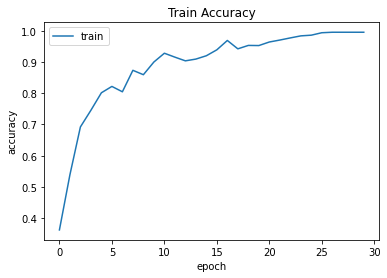

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

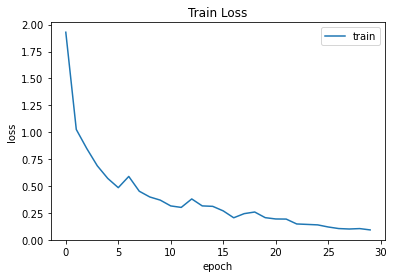

In [9]:
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

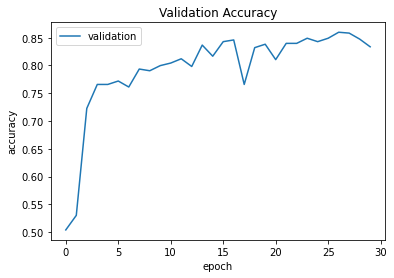

In [10]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'],loc='upper left')
plt.show()

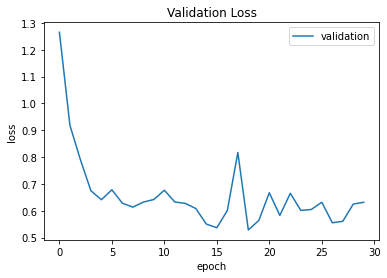

In [11]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation'],loc='upper right')
plt.show()

In [12]:
model.evaluate(test_generator)

6/6 [==============================] - 11s 2s/step - loss: 0.5672 - accuracy: 0.8848


[0.5671653747558594, 0.8848484754562378]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

pred = model.predict(test_generator)
pred_classes = [np.argmax(element) for element in pred]

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, pred_classes, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

      Benign       0.77      0.83      0.80        52
       Early       0.92      0.81      0.86        99
         Pre       0.89      0.91      0.90        97
         Pro       0.92      0.99      0.95        82

    accuracy                           0.88       330
   macro avg       0.87      0.88      0.88       330
weighted avg       0.89      0.88      0.88       330

